In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv("data.csv",index_col=0)
data

,hasAlzheimerDisease,ChanceToHaveAlzheimerDisease,hasArthritis,ChanceToHaveArthritis,hasCancer,ChanceToHaveCancer,hasDementia,ChanceToHaveDementia,hasDiabetes,ChanceToHaveDiabetes,...,hasHighBloodPressure,ChanceToHaveHighBloodPressure,hasMultipleSclerosis,ChanceToHaveMultipleSclerosis,hasParkinsonDisease,ChanceToHaveParkinsonDisease,hasSpinaBifida,ChanceToHaveSpinaBifida,hasThyroidDisorders,ChanceToHaveThyroidDisorders
0,True,0.833333,False,0.4,True,0.8,False,0.4,False,0.4,...,True,0.8,True,0.8,True,0.8,True,0.8,True,0.8
1,True,0.750000,False,0.4,True,1.2,False,0.2,True,0.6,...,True,1.2,True,1.2,True,1.2,True,1.2,True,1.2
2,False,0.500000,False,0.4,False,0.2,True,0.6,True,0.6,...,False,0.2,False,0.2,False,0.2,False,0.2,False,0.2
3,False,0.500000,True,0.6,False,0.2,True,0.6,True,1.0,...,False,0.2,False,0.2,False,0.2,False,0.2,False,0.2
4,True,0.666667,True,0.6,True,0.6,True,0.6,True,0.6,...,True,0.6,True,0.6,True,0.6,True,0.6,True,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75430,False,0.500000,False,0.2,False,0.4,False,0.4,False,0.2,...,False,0.4,False,0.4,False,0.4,False,0.4,False,0.4
75431,False,0.500000,False,0.4,False,0.4,False,0.4,False,0.4,...,False,0.4,False,0.4,False,0.4,False,0.4,False,0.4
75432,False,0.500000,False,0.2,False,0.4,True,0.6,False,0.4,...,False,0.4,False,0.4,False,0.4,False,0.4,False,0.4
75433,True,0.833333,True,0.6,True,0.6,True,0.6,True,0.6,...,True,0.6,True,0.6,True,0.6,True,0.6,True,0.6


In [3]:
data.columns[10]

'hasHeartDisease '

In [4]:
data.describe()

,ChanceToHaveAlzheimerDisease,ChanceToHaveArthritis,ChanceToHaveCancer,ChanceToHaveDementia,ChanceToHaveDiabetes,ChanceToHaveHeartDisease,ChanceToHaveHighBloodPressure,ChanceToHaveMultipleSclerosis,ChanceToHaveParkinsonDisease,ChanceToHaveSpinaBifida,ChanceToHaveThyroidDisorders
count,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000,75435.000000
mean,0.498529,0.500264,0.500795,0.498806,0.500473,0.500462,0.500795,0.500795,0.500795,0.500795,0.500795
std,0.203642,0.224109,0.223543,0.223758,0.223108,0.249844,0.223543,0.223543,0.223543,0.223543,0.223543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.400000,0.400000,0.400000,0.400000,0.250000,0.400000,0.400000,0.400000,0.400000,0.400000
50%,0.500000,0.400000,0.600000,0.400000,0.600000,0.500000,0.600000,0.600000,0.600000,0.600000,0.600000
75%,0.666667,0.600000,0.600000,0.600000,0.600000,0.750000,0.600000,0.600000,0.600000,0.600000,0.600000
max,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000,1.200000,1.200000,1.200000,1.200000,1.200000


Object columns : Index([], dtype='object')

Numberical columns : Index(['hasAlzheimerDisease ', 'ChanceToHaveAlzheimerDisease ',
       'hasArthritis ', 'ChanceToHaveArthritis ', 'hasCancer ',
       'ChanceToHaveCancer ', 'hasDementia ', 'ChanceToHaveDementia ',
       'hasDiabetes ', 'ChanceToHaveDiabetes ', 'hasHeartDisease ',
       'ChanceToHaveHeartDisease ', 'hasHighBloodPressure ',
       'ChanceToHaveHighBloodPressure ', 'hasMultipleSclerosis ',
       'ChanceToHaveMultipleSclerosis ', 'hasParkinsonDisease ',
       'ChanceToHaveParkinsonDisease ', 'hasSpinaBifida ',
       'ChanceToHaveSpinaBifida ', 'hasThyroidDisorders ',
       'ChanceToHaveThyroidDisorders '],
      dtype='object')


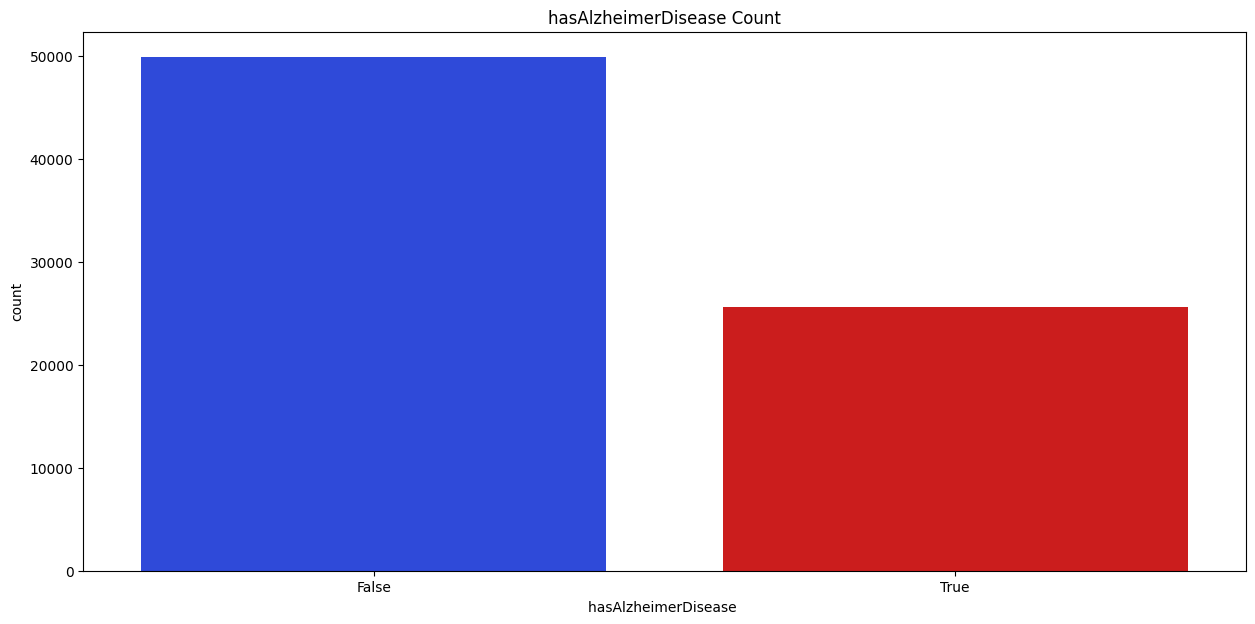

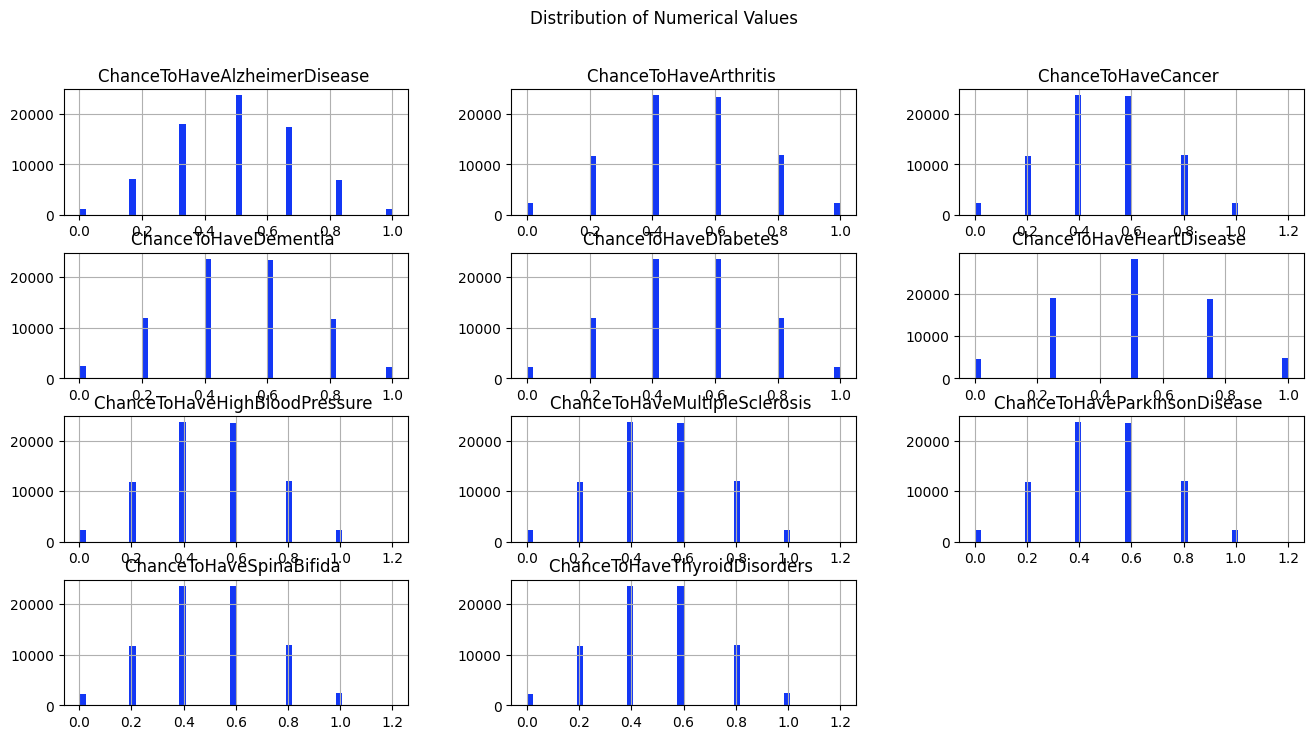

<Figure size 2000x4000 with 0 Axes>

In [5]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('hasAlzheimerDisease Count') 
sns.countplot(data=data, x='hasAlzheimerDisease ', palette=colors2, order=data['hasAlzheimerDisease '].value_counts().index)
data.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 


obj_cols = data.select_dtypes(include='object').columns[1:]
num_cols = data.select_dtypes(exclude='object').columns
print(f'Object columns : {obj_cols}', end='\n\n')
print(f'Numberical columns : {num_cols}')
plt.figure(figsize=(20, 40))
for i in range(len(obj_cols)):
  plt.subplot(7, 2, i+1)

  if(data[obj_cols[i]].nunique() < 3):
    ax = sns.countplot(data=data, x=obj_cols[i], palette=colors2, order=data[obj_cols[i]].value_counts().index[:6])
  else:
    ax = sns.countplot(data=data, x=obj_cols[i], palette=colors2, order=data[obj_cols[i]].value_counts().index[:6])

  
  plt.title(f'{obj_cols[i]}', fontsize=15, fontweight='bold', color='brown')
  plt.subplots_adjust(hspace=0.5)

  for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()
    percent = height/len(data)

    ax.text(x=p.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, ha='center', weight='bold')

Text(0.5, 0.98, 'Distribution of Numerical Values')

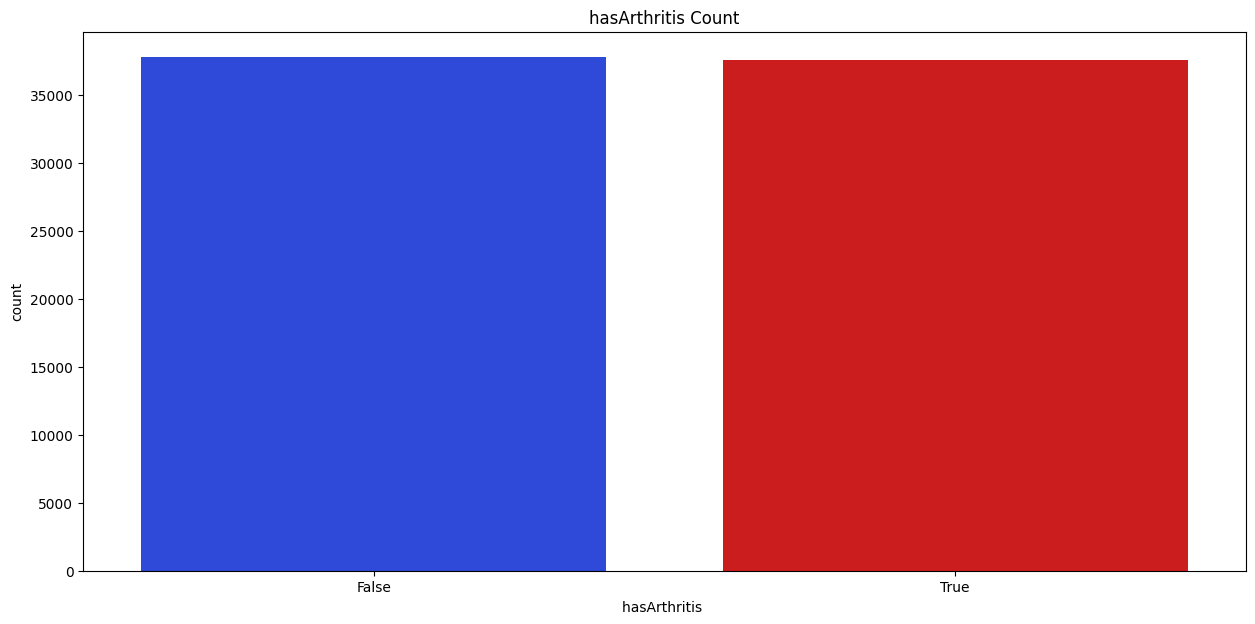

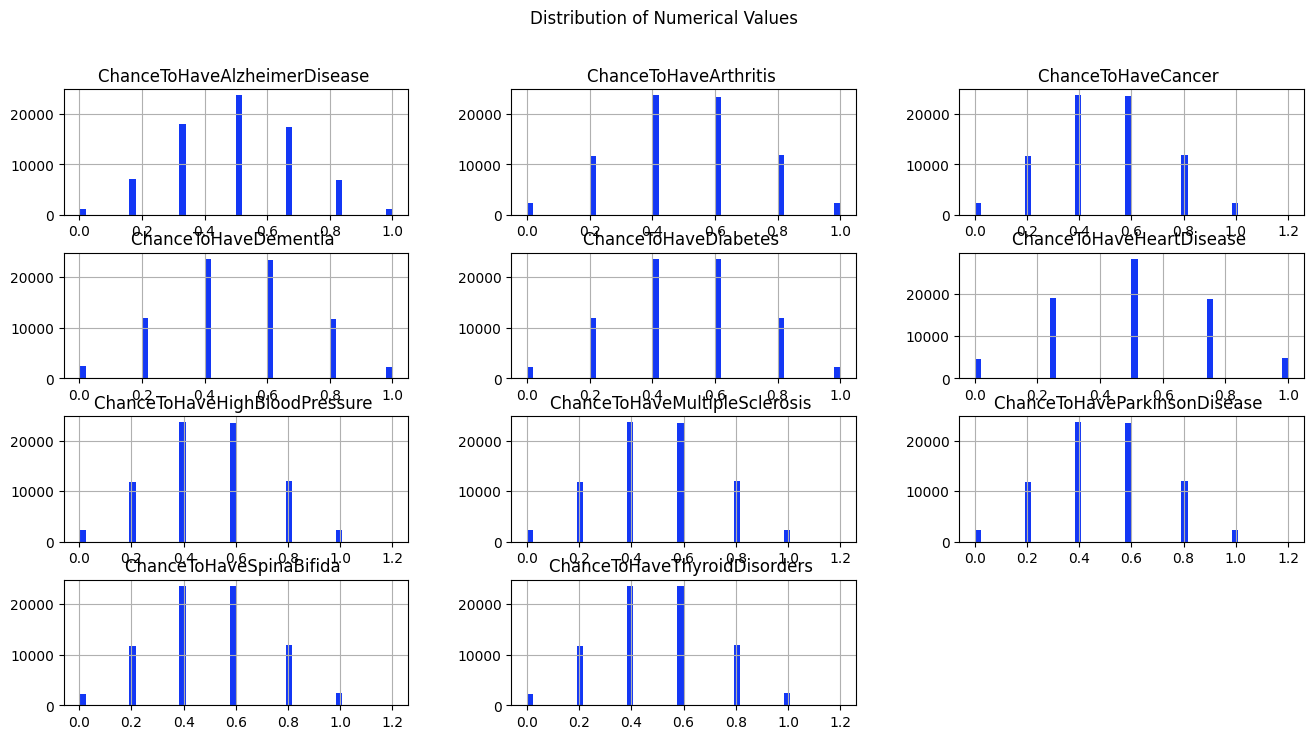

In [6]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('hasArthritis Count') 
sns.countplot(data=data, x='hasArthritis ', palette=colors2, order=data['hasArthritis '].value_counts().index)
data.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 

Text(0.5, 0.98, 'Distribution of Numerical Values')

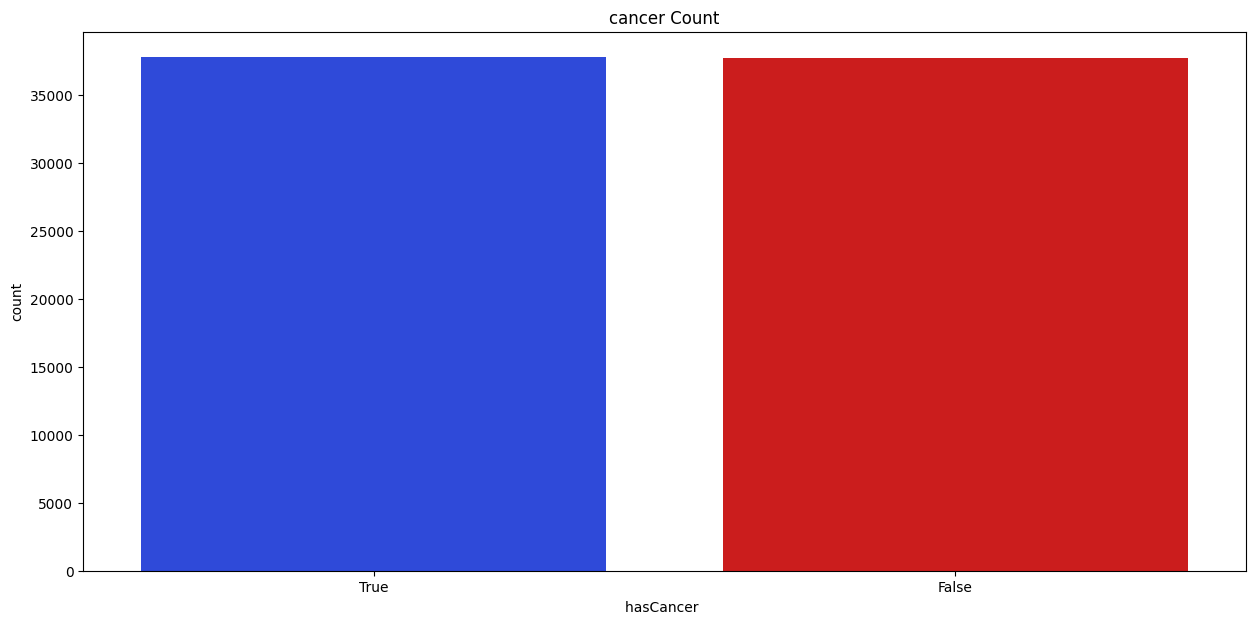

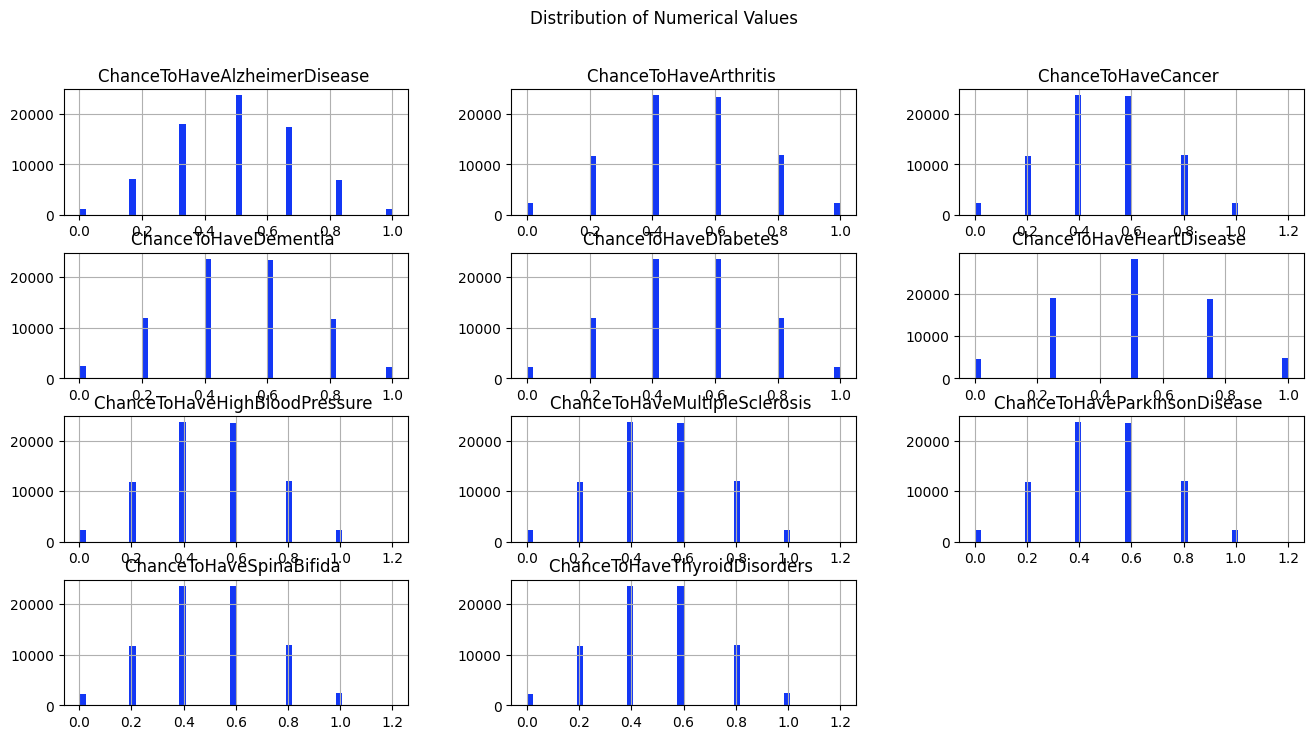

In [7]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('cancer Count') 
sns.countplot(data=data, x='hasCancer ', palette=colors2, order=data['hasCancer '].value_counts().index)
data.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 

Text(0.5, 0.98, 'Distribution of Numerical Values')

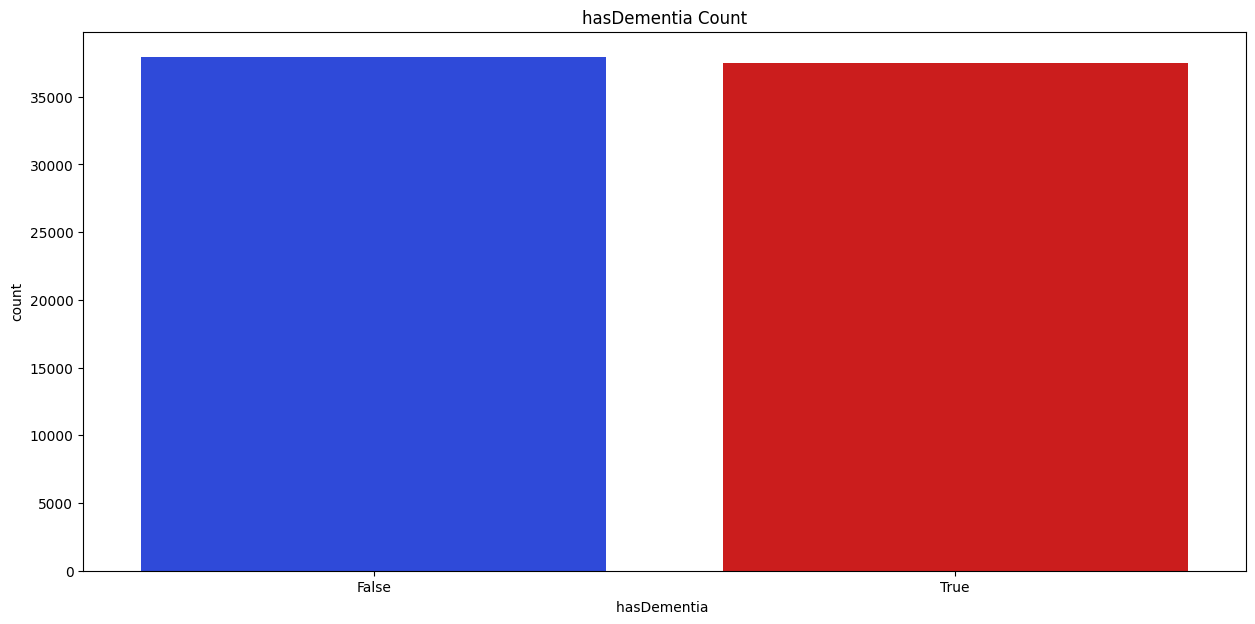

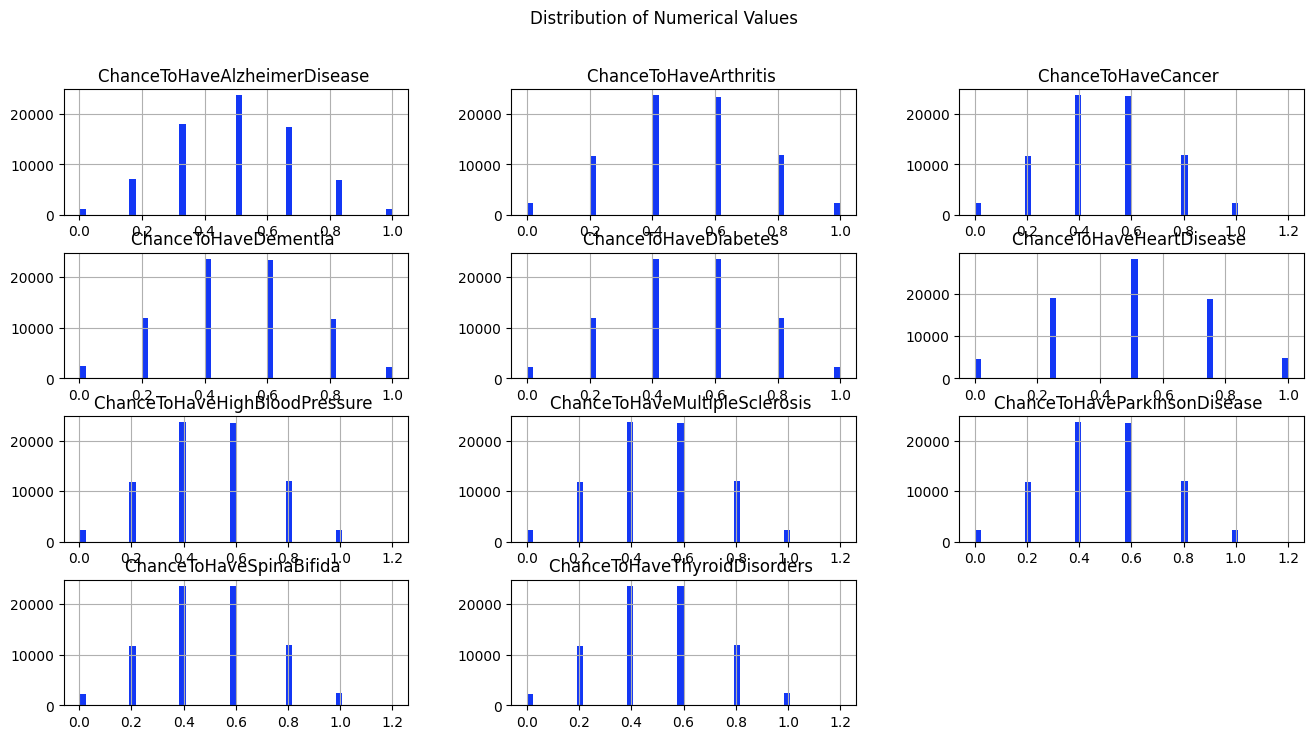

In [8]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('hasDementia Count') 
sns.countplot(data=data, x='hasDementia ', palette=colors2, order=data['hasDementia '].value_counts().index)
data.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 

Text(0.5, 0.98, 'Distribution of Numerical Values')

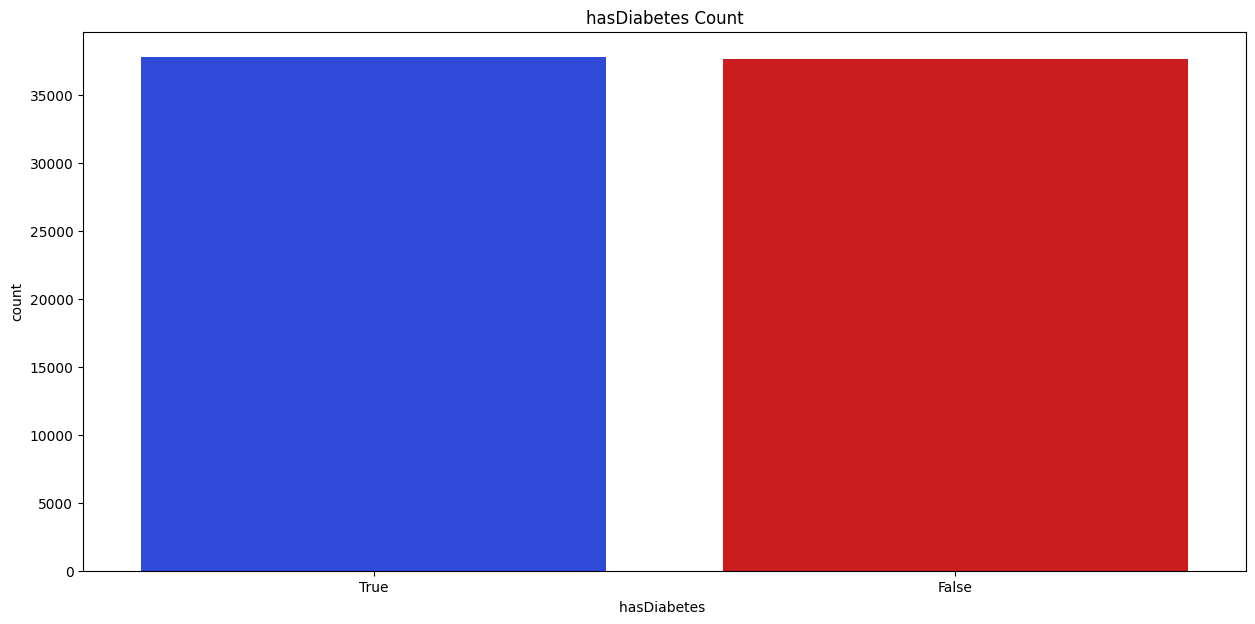

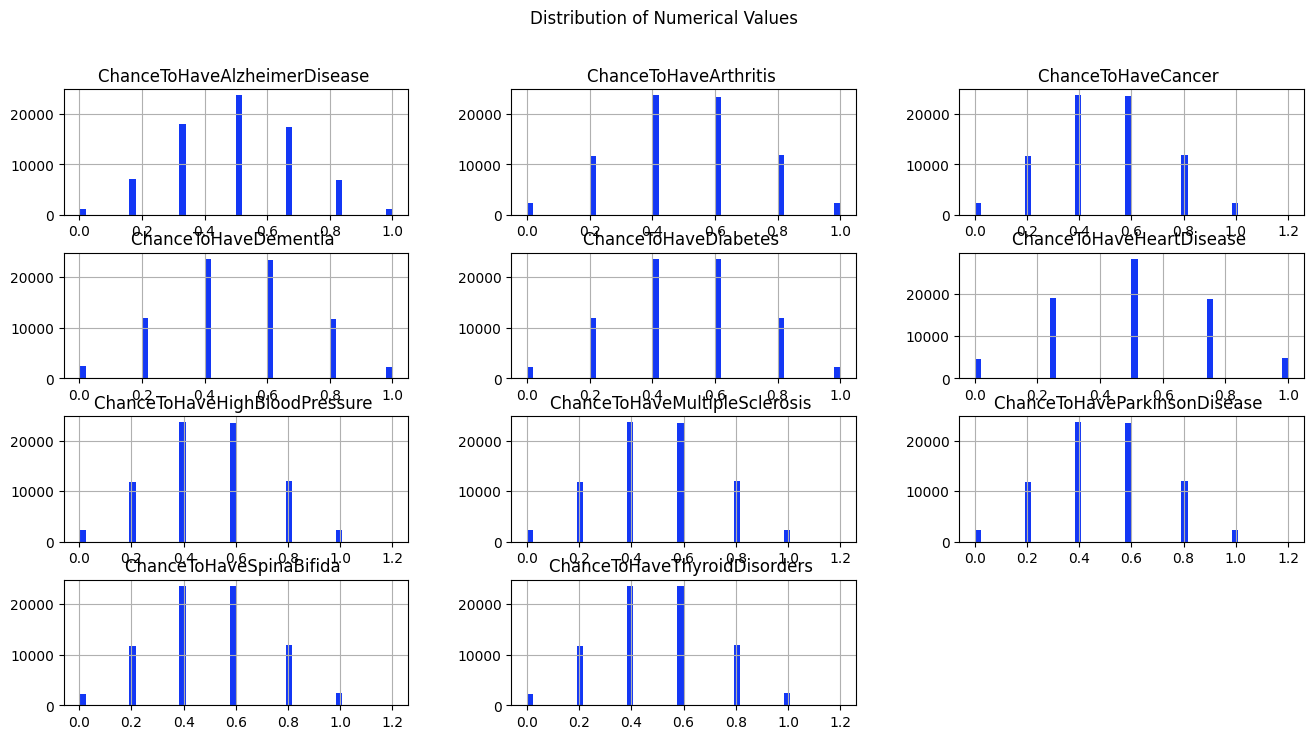

In [9]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('hasDiabetes Count') 
sns.countplot(data=data, x='hasDiabetes ', palette=colors2, order=data['hasDiabetes '].value_counts().index)
data.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 

In [10]:
ordinal_encoder = OrdinalEncoder()


In [11]:
# ordinal encoder
data[['hasAlzheimerDisease ']] = ordinal_encoder.fit_transform(data[['hasAlzheimerDisease ']])
data[['hasThyroidDisorders ']] = ordinal_encoder.fit_transform(data[['hasThyroidDisorders ']])
data[['hasSpinaBifida ']] = ordinal_encoder.fit_transform(data[['hasSpinaBifida ']])
data[['hasMultipleSclerosis ']] = ordinal_encoder.fit_transform(data[['hasMultipleSclerosis ']])
data[['hasHighBloodPressure ']] = ordinal_encoder.fit_transform(data[['hasHighBloodPressure ']])
data[['hasArthritis ']] = ordinal_encoder.fit_transform(data[['hasArthritis ']])
data[['hasCancer ']] = ordinal_encoder.fit_transform(data[['hasCancer ']])
data[['hasDementia ']] = ordinal_encoder.fit_transform(data[['hasDementia ']])
data[['hasDiabetes ']] = ordinal_encoder.fit_transform(data[['hasDiabetes ']])
data[['hasParkinsonDisease ']] = ordinal_encoder.fit_transform(data[['hasParkinsonDisease ']])
data[['hasHeartDisease ']] = ordinal_encoder.fit_transform(data[['hasHeartDisease ']])
data

,hasAlzheimerDisease,ChanceToHaveAlzheimerDisease,hasArthritis,ChanceToHaveArthritis,hasCancer,ChanceToHaveCancer,hasDementia,ChanceToHaveDementia,hasDiabetes,ChanceToHaveDiabetes,...,hasHighBloodPressure,ChanceToHaveHighBloodPressure,hasMultipleSclerosis,ChanceToHaveMultipleSclerosis,hasParkinsonDisease,ChanceToHaveParkinsonDisease,hasSpinaBifida,ChanceToHaveSpinaBifida,hasThyroidDisorders,ChanceToHaveThyroidDisorders
0,1.0,0.833333,0.0,0.4,1.0,0.8,0.0,0.4,0.0,0.4,...,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8
1,1.0,0.750000,0.0,0.4,1.0,1.2,0.0,0.2,1.0,0.6,...,1.0,1.2,1.0,1.2,1.0,1.2,1.0,1.2,1.0,1.2
2,0.0,0.500000,0.0,0.4,0.0,0.2,1.0,0.6,1.0,0.6,...,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2
3,0.0,0.500000,1.0,0.6,0.0,0.2,1.0,0.6,1.0,1.0,...,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2
4,1.0,0.666667,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75430,0.0,0.500000,0.0,0.2,0.0,0.4,0.0,0.4,0.0,0.2,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4
75431,0.0,0.500000,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4
75432,0.0,0.500000,0.0,0.2,0.0,0.4,1.0,0.6,0.0,0.4,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4
75433,1.0,0.833333,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6


In [12]:
def try_model(model_pipeline, X_train, y_train, X_test, y_test):
    
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    print(model_pipeline.score(X_test, y_test))

    print(f"precision {precision_score(y_test, y_pred)}")
    print(f"recall {recall_score(y_test, y_pred)}")
    print(f"f1_score {f1_score(y_test, y_pred)}")
   
    #print(f'Training Accuracy : {model_pipeline.score(X_train, y_train)}')
    #print(f'Test Accuracy : {model_pipeline.score(X_test, y_test)}')
    #confusion_matrix(X_train, y_train)

    return y_pred, classification_report(y_test, y_pred)

In [13]:

#print(data['hasDiabetes '])
# 
Y = data['hasDiabetes ']
# print(X.shape)



In [14]:
X = data.drop(columns=['hasDiabetes '])
print(X)

       hasAlzheimerDisease   ChanceToHaveAlzheimerDisease   hasArthritis   \
0                       1.0                       0.833333            0.0   
1                       1.0                       0.750000            0.0   
2                       0.0                       0.500000            0.0   
3                       0.0                       0.500000            1.0   
4                       1.0                       0.666667            1.0   
...                     ...                            ...            ...   
75430                   0.0                       0.500000            0.0   
75431                   0.0                       0.500000            0.0   
75432                   0.0                       0.500000            0.0   
75433                   1.0                       0.833333            1.0   
75434                   1.0                       1.000000            0.0   

       ChanceToHaveArthritis   hasCancer   ChanceToHaveCancer   hasDementia

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train

,hasAlzheimerDisease,ChanceToHaveAlzheimerDisease,hasArthritis,ChanceToHaveArthritis,hasCancer,ChanceToHaveCancer,hasDementia,ChanceToHaveDementia,ChanceToHaveDiabetes,hasHeartDisease,...,hasHighBloodPressure,ChanceToHaveHighBloodPressure,hasMultipleSclerosis,ChanceToHaveMultipleSclerosis,hasParkinsonDisease,ChanceToHaveParkinsonDisease,hasSpinaBifida,ChanceToHaveSpinaBifida,hasThyroidDisorders,ChanceToHaveThyroidDisorders
62553,1.0,0.666667,1.0,0.6,1.0,0.8,1.0,0.6,0.6,0.0,...,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8
16332,1.0,0.666667,1.0,0.6,1.0,0.6,0.0,0.4,0.6,0.0,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
13930,0.0,0.333333,0.0,0.2,1.0,0.6,0.0,0.4,0.6,0.0,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
23745,1.0,0.666667,0.0,0.4,1.0,0.8,0.0,0.4,0.6,0.0,...,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8
39454,1.0,0.833333,0.0,0.0,1.0,0.8,0.0,0.4,0.2,1.0,...,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50569,0.0,0.500000,1.0,0.8,1.0,0.6,1.0,0.6,0.6,0.0,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
25079,1.0,0.666667,1.0,0.6,1.0,0.6,0.0,0.4,0.4,1.0,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
26562,0.0,0.166667,0.0,0.4,1.0,0.6,1.0,0.6,0.4,0.0,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
26238,1.0,0.666667,0.0,0.4,0.0,0.4,0.0,0.4,0.6,0.0,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4


TRAIN: [25045 25046 25047 ... 75432 75433 75434] TEST: [    0     1     2 ... 25245 25246 25247]
1.0    0.501034
0.0    0.498966
Name: hasDiabetes , dtype: float64
1.0    0.501014
0.0    0.498986
Name: hasDiabetes , dtype: float64
hasAlzheimerDisease   ChanceToHaveAlzheimerDisease   hasArthritis   ChanceToHaveArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.5                            0.0            0.4                     1.0         0.6                  1.0           0.6                    0.4                    0.0               0.50                       1.0                    0.6                         

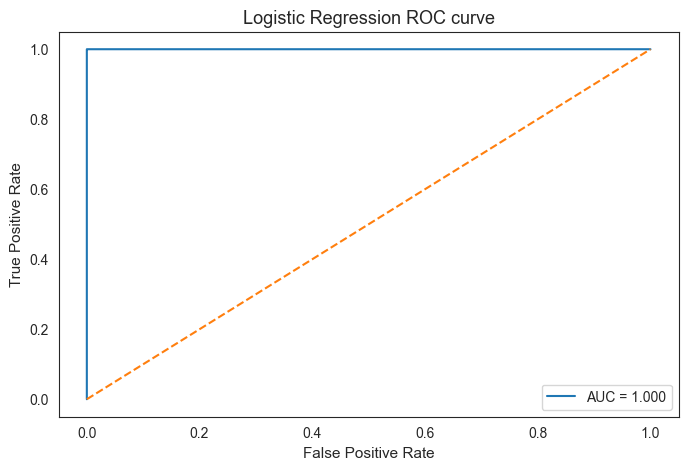

TRAIN: [    0     1     2 ... 75432 75433 75434] TEST: [25045 25046 25047 ... 50419 50421 50424]
1.0    0.501034
0.0    0.498966
Name: hasDiabetes , dtype: float64
1.0    0.501014
0.0    0.498986
Name: hasDiabetes , dtype: float64
hasAlzheimerDisease   ChanceToHaveAlzheimerDisease   hasArthritis   ChanceToHaveArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.5                            0.0            0.4                     1.0         0.6                  1.0           0.6                    0.4                    0.0               0.50                       1.0                    0.6                         

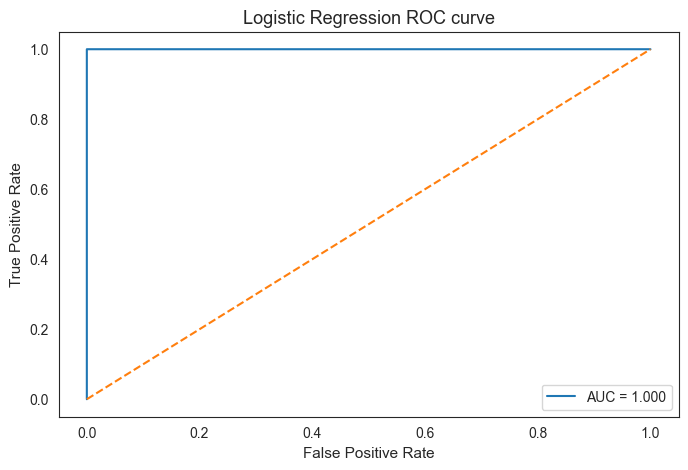

TRAIN: [    0     1     2 ... 50419 50421 50424] TEST: [50143 50150 50153 ... 75432 75433 75434]
1.0    0.501014
0.0    0.498986
Name: hasDiabetes , dtype: float64
1.0    0.501054
0.0    0.498946
Name: hasDiabetes , dtype: float64
hasAlzheimerDisease   ChanceToHaveAlzheimerDisease   hasArthritis   ChanceToHaveArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.5                            0.0            0.4                     1.0         0.6                  1.0           0.6                    0.4                    0.0               0.50                       1.0                    0.6                         

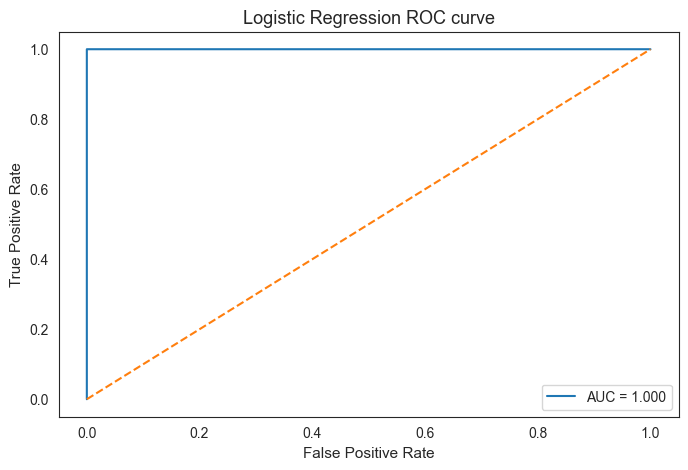

In [16]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_set, x_test=X.reindex( train_index), X.reindex( test_index) 
    y_train_set, y_test_set = Y[train_index], Y[test_index]
    print(y_train_set.value_counts()/len(y_train_set))
    print(y_test_set.value_counts()/len(y_test_set))
    print(X.value_counts()/len(y_test_set))
    lr = LogisticRegression()
    y_pred, report = try_model(lr,
                            x_train_set,
                            y_train_set,
                            x_test,
                            y_test_set)
    y_predict_prob = lr.predict_proba(x_test)[:, 1]

    print(report)
    fpr, tpr, thresholds = roc_curve(y_test_set, y_predict_prob)
    auc = roc_auc_score(y_test_set, y_predict_prob)
    sns.set_style("white")
    plt.figure(figsize = [8, 5])
    plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
    plt.plot((0,1), ls = "--")
    plt.title("Logistic Regression ROC curve", size = 13)
    plt.xlabel("False Positive Rate", size = 11)
    plt.ylabel("True Positive Rate", size = 11)
    plt.legend(loc = 'best')
    plt.show()
    plt.show() 

In [17]:
Y1 = data['hasAlzheimerDisease ']


In [18]:
X1 = data.drop(columns=['ChanceToHaveAlzheimerDisease ','ChanceToHaveArthritis '])
print(X1)

       hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   \
0                       1.0            0.0         1.0                  0.8   
1                       1.0            0.0         1.0                  1.2   
2                       0.0            0.0         0.0                  0.2   
3                       0.0            1.0         0.0                  0.2   
4                       1.0            1.0         1.0                  0.6   
...                     ...            ...         ...                  ...   
75430                   0.0            0.0         0.0                  0.4   
75431                   0.0            0.0         0.0                  0.4   
75432                   0.0            0.0         0.0                  0.4   
75433                   1.0            1.0         1.0                  0.6   
75434                   1.0            0.0         1.0                  0.6   

       hasDementia   ChanceToHaveDementia   hasDiab

TRAIN: [25109 25110 25111 ... 75432 75433 75434] TEST: [    0     1     2 ... 25208 25211 25212]
0.0    0.661026
1.0    0.338974
Name: hasAlzheimerDisease , dtype: float64
0.0    0.661006
1.0    0.338994
Name: hasAlzheimerDisease , dtype: float64
hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   hasDiabetes   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.0            0.0         0.4                  0.0           0.4                    0.0           0.4                    0.0               0.50                       0.0                    0.4                             0.0                    0.4                             0.0    

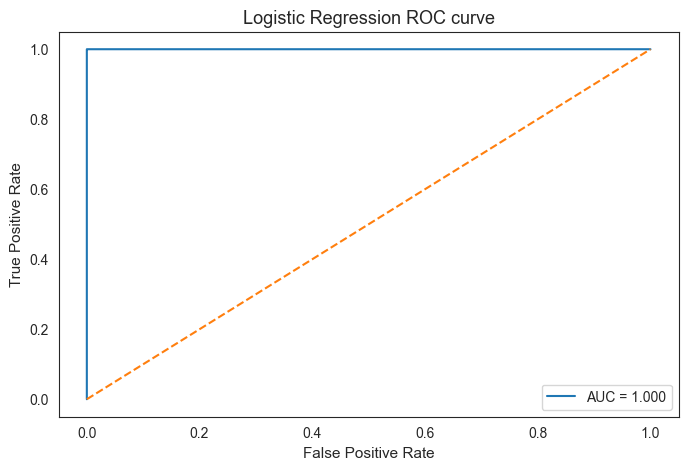

TRAIN: [    0     1     2 ... 75432 75433 75434] TEST: [25109 25110 25111 ... 50488 50491 50496]
0.0    0.661026
1.0    0.338974
Name: hasAlzheimerDisease , dtype: float64
0.0    0.661006
1.0    0.338994
Name: hasAlzheimerDisease , dtype: float64
hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   hasDiabetes   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.0            0.0         0.4                  0.0           0.4                    0.0           0.4                    0.0               0.50                       0.0                    0.4                             0.0                    0.4                             0.0    

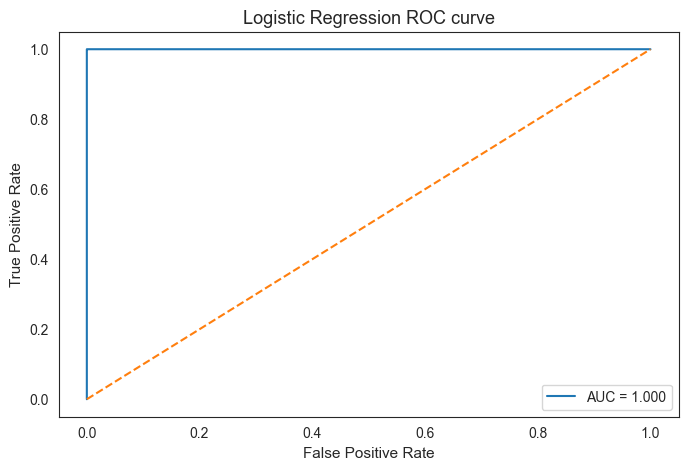

TRAIN: [    0     1     2 ... 50488 50491 50496] TEST: [50179 50183 50185 ... 75432 75433 75434]
0.0    0.661006
1.0    0.338994
Name: hasAlzheimerDisease , dtype: float64
0.0    0.661046
1.0    0.338954
Name: hasAlzheimerDisease , dtype: float64
hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   hasDiabetes   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.0            0.0         0.4                  0.0           0.4                    0.0           0.4                    0.0               0.50                       0.0                    0.4                             0.0                    0.4                             0.0    

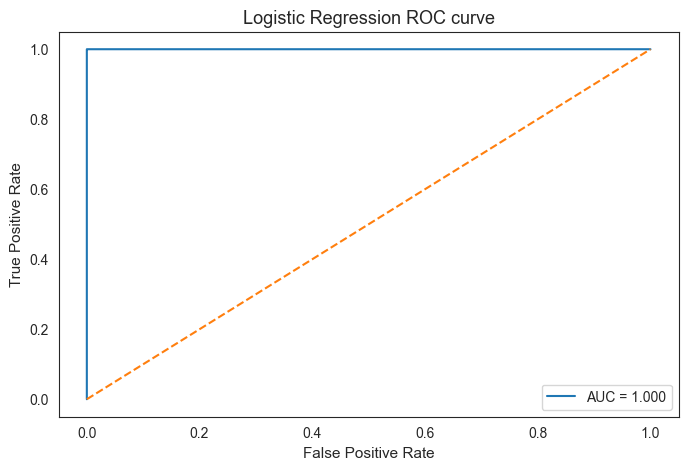

In [19]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X1, Y1):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_set, x_test=X1.reindex( train_index), X1.reindex( test_index) 
    y_train_set, y_test_set = Y1[train_index], Y1[test_index]
    print(y_train_set.value_counts()/len(y_train_set))
    print(y_test_set.value_counts()/len(y_test_set))
    print(X1.value_counts()/len(y_test_set))
    lr = LogisticRegression()
    y_pred, report = try_model(lr,
                            x_train_set,
                            y_train_set,
                            x_test,
                            y_test_set)
    y_predict_prob = lr.predict_proba(x_test)[:, 1]

    print(report)
    fpr, tpr, thresholds = roc_curve(y_test_set, y_predict_prob)
    auc = roc_auc_score(y_test_set, y_predict_prob)
    sns.set_style("white")
    plt.figure(figsize = [8, 5])
    plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
    plt.plot((0,1), ls = "--")
    plt.title("Logistic Regression ROC curve", size = 13)
    plt.xlabel("False Positive Rate", size = 11)
    plt.ylabel("True Positive Rate", size = 11)
    plt.legend(loc = 'best')
    plt.show()
    plt.show() 

In [20]:
X3 = data.drop(columns=['hasHighBloodPressure '])


In [21]:
Y3 = data['hasHighBloodPressure ']



TRAIN: [25104 25106 25107 ... 75432 75433 75434] TEST: [    0     1     2 ... 25178 25181 25182]
1.0    0.500338
0.0    0.499662
Name: hasHighBloodPressure , dtype: float64
1.0    0.500378
0.0    0.499622
Name: hasHighBloodPressure , dtype: float64
hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   hasDiabetes   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.0            0.0         0.4                  0.0           0.4                    0.0           0.4                    0.0               0.50                       0.0                    0.4                             0.0                    0.4                             0.0  

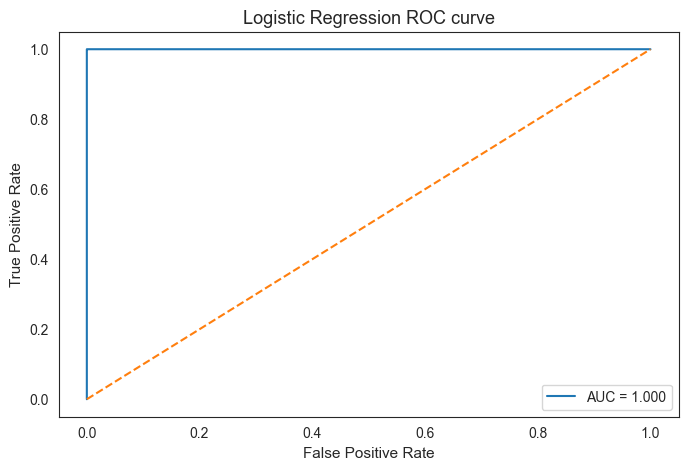

TRAIN: [    0     1     2 ... 75432 75433 75434] TEST: [25104 25106 25107 ... 50323 50326 50327]
1.0    0.500358
0.0    0.499642
Name: hasHighBloodPressure , dtype: float64
1.0    0.500338
0.0    0.499662
Name: hasHighBloodPressure , dtype: float64
hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   hasDiabetes   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.0            0.0         0.4                  0.0           0.4                    0.0           0.4                    0.0               0.50                       0.0                    0.4                             0.0                    0.4                             0.0  

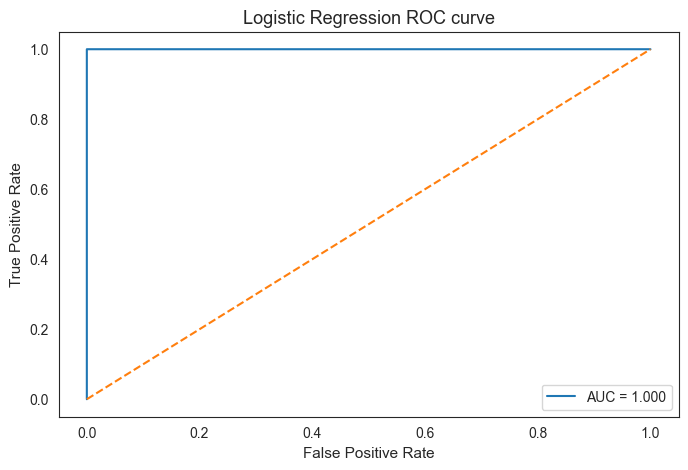

TRAIN: [    0     1     2 ... 50323 50326 50327] TEST: [50242 50247 50249 ... 75432 75433 75434]
1.0    0.500358
0.0    0.499642
Name: hasHighBloodPressure , dtype: float64
1.0    0.500338
0.0    0.499662
Name: hasHighBloodPressure , dtype: float64
hasAlzheimerDisease   hasArthritis   hasCancer   ChanceToHaveCancer   hasDementia   ChanceToHaveDementia   hasDiabetes   ChanceToHaveDiabetes   hasHeartDisease   ChanceToHaveHeartDisease   hasHighBloodPressure   ChanceToHaveHighBloodPressure   hasMultipleSclerosis   ChanceToHaveMultipleSclerosis   hasParkinsonDisease   ChanceToHaveParkinsonDisease   hasSpinaBifida   ChanceToHaveSpinaBifida   hasThyroidDisorders   ChanceToHaveThyroidDisorders 
0.0                   0.0            0.0         0.4                  0.0           0.4                    0.0           0.4                    0.0               0.50                       0.0                    0.4                             0.0                    0.4                             0.0  

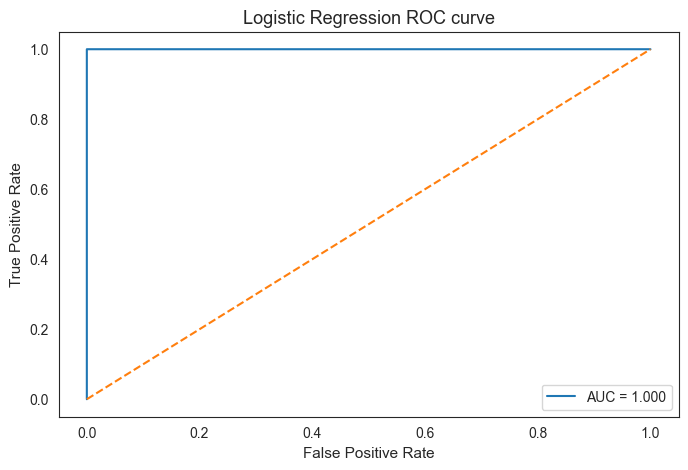

In [22]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X3, Y3):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_set, x_test=X3.reindex( train_index), X3.reindex( test_index) 
    y_train_set, y_test_set = Y3[train_index], Y3[test_index]
    print(y_train_set.value_counts()/len(y_train_set))
    print(y_test_set.value_counts()/len(y_test_set))
    print(X1.value_counts()/len(y_test_set))
    lr = LogisticRegression()
    y_pred, report = try_model(lr,
                            x_train_set,
                            y_train_set,
                            x_test,
                            y_test_set)
    y_predict_prob = lr.predict_proba(x_test)[:, 1]

    print(report)
    fpr, tpr, thresholds = roc_curve(y_test_set, y_predict_prob)
    auc = roc_auc_score(y_test_set, y_predict_prob)
    sns.set_style("white")
    plt.figure(figsize = [8, 5])
    plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
    plt.plot((0,1), ls = "--")
    plt.title("Logistic Regression ROC curve", size = 13)
    plt.xlabel("False Positive Rate", size = 11)
    plt.ylabel("True Positive Rate", size = 11)
    plt.legend(loc = 'best')
    plt.show()
    plt.show() 

In [23]:
from sklearn.svm import SVC
classifer=SVC(kernel='linear')
classifer.fit(X_train,Y_train)
X_train_prediction=classifer.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data :',training_data_accuracy)

Accuracy score of the training data : 1.0


In [24]:
X_test_prediction=classifer.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of the testing data :',test_data_accuracy)

Accuracy score of the testing data : 1.0


In [25]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(random_state=42)

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)
precision_score(Y_train, y_train_pred)

1.0

In [27]:
recall_score(Y_train, y_train_pred)

1.0

In [28]:
f1_score(Y_train, y_train_pred)

1.0

In [29]:
#Random FOREST
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_clf.fit(X_train,Y_train)
# y_pred_rf=rnd_clf.predict(X_test)
# print(f"precision {precision_score(Y_test, y_pred)}")
# print(f"recall {recall_score(Y_test, y_pred)}")

In [30]:
#Voting classfier
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,Y_train)
for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    # 1.logistic =0.694
    #2.Random =0.6818
    # 3. SVC=0.6623
    # 4. Voting classfier
    print(accuracy_score(Y_test,y_pred))

1.0
1.0
1.0
1.0


In [31]:
#AdaBoot
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,learning_rate=0.5,)
ada_clf.fit(X_train,Y_train)
y_pred_rf=ada_clf.predict(X_test)
print(f"recall {recall_score(Y_test, y_pred)}")
print(f"precision {precision_score(Y_test, y_pred)}")

recall 1.0
precision 1.0


In [32]:
# Bagging and Pasting
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,Y_train)
y_pred=bag_clf.predict(X_test)
print(f"recall {recall_score(Y_test, y_pred)}")
print(f"precision {precision_score(Y_test, y_pred)}")
print(f"precision {precision_score(Y_test, y_pred)}")

recall 1.0
precision 1.0
precision 1.0


In [33]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train)
y_pred_rf=xgb_clf.predict(X_test)
print(f"recall {recall_score(Y_test, y_pred_rf)}")
print(f"precision {precision_score(Y_test, y_pred)}")

recall 1.0
precision 1.0


In [34]:
X_valid,XX_text,y_valid,y_test=train_test_split(X_test,Y_test,test_size=0.5,random_state=0)

In [35]:
#neural network
import tensorflow as tf
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu'),
                           tf.keras.layers.Dense(16,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])


In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [37]:
model.evaluate(X_train,Y_train)

1886/1886 [==============================] - 4s 2ms/step - loss: 0.6854 - accuracy: 0.5512


[0.6854392290115356, 0.5512195825576782]

In [38]:
# batch like a sample
model.fit(X_train,Y_train,batch_size=16,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
3772/3772 [==============================] - 9s 2ms/step - loss: 0.0918 - accuracy: 0.9712 - val_loss: 5.6905e-04 - val_accuracy: 1.0000
Epoch 2/5
3772/3772 [==============================] - 6s 2ms/step - loss: 1.5419e-04 - accuracy: 1.0000 - val_loss: 2.8301e-05 - val_accuracy: 1.0000
Epoch 3/5
3772/3772 [==============================] - 7s 2ms/step - loss: 1.0506e-05 - accuracy: 1.0000 - val_loss: 2.9298e-06 - val_accuracy: 1.0000
Epoch 4/5
3772/3772 [==============================] - 7s 2ms/step - loss: 1.1493e-06 - accuracy: 1.0000 - val_loss: 3.5472e-07 - val_accuracy: 1.0000
Epoch 5/5
3772/3772 [==============================] - 7s 2ms/step - loss: 1.4273e-07 - accuracy: 1.0000 - val_loss: 4.8577e-08 - val_accuracy: 1.0000


In [40]:
# print('Best parameters:', grid_search.best_params_)

NameError: name 'grid_search' is not defined